In [1]:
# Importar bibliotecas necessárias
import pandas as pd

# Caminho do arquivo no ambiente do Kaggle
file_path = '/kaggle/input/python-m10-support-material/Python_M10_support material.csv'

# Carregar os dados
data = pd.read_csv(file_path)

# Visualizar as primeiras linhas do dataset
data.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


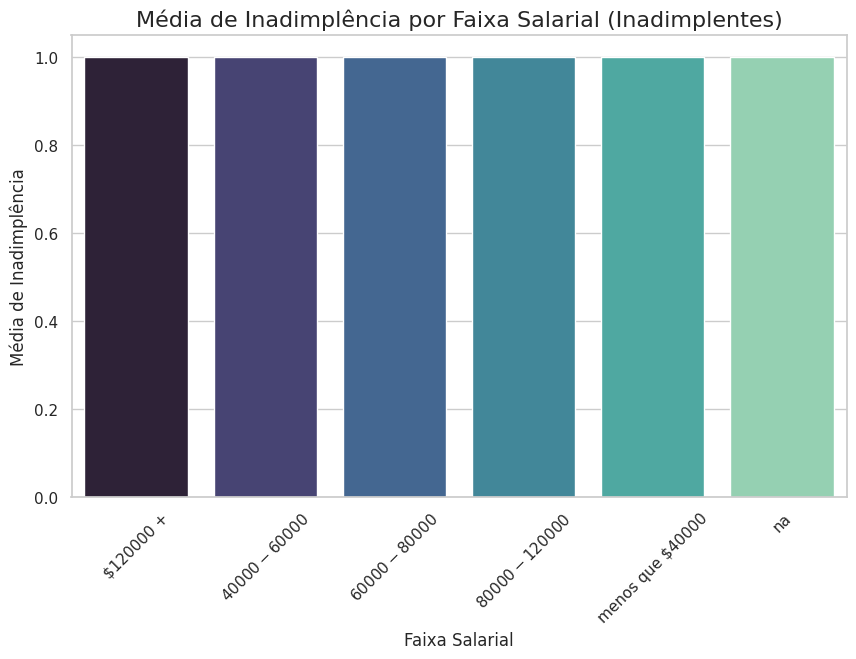

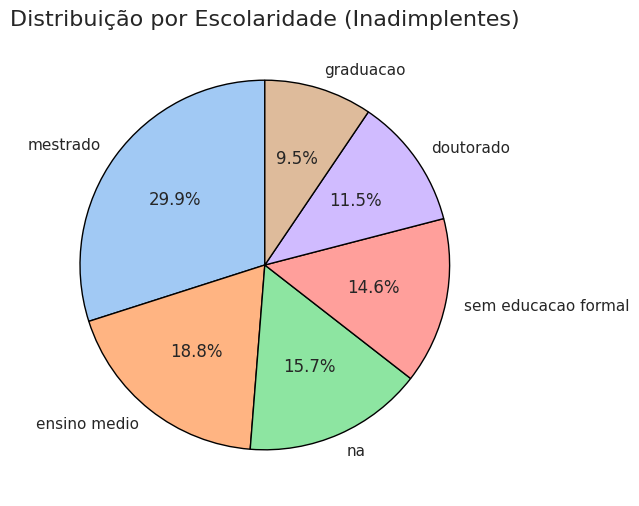

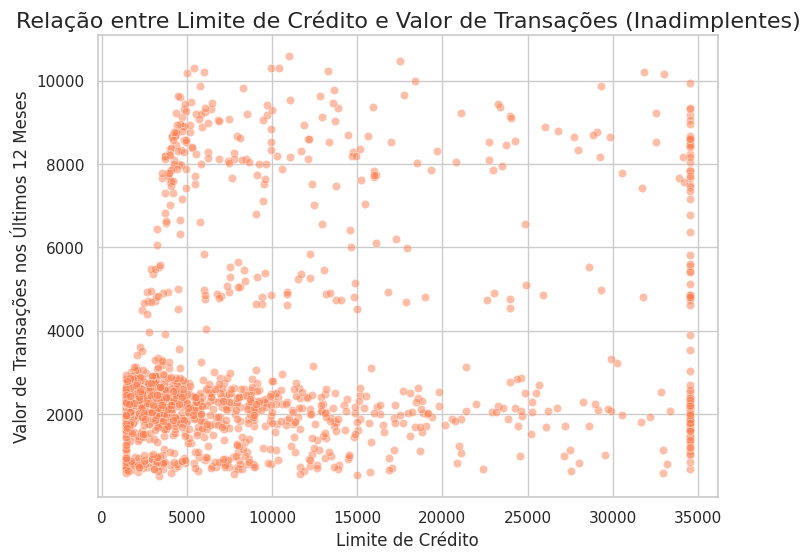

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


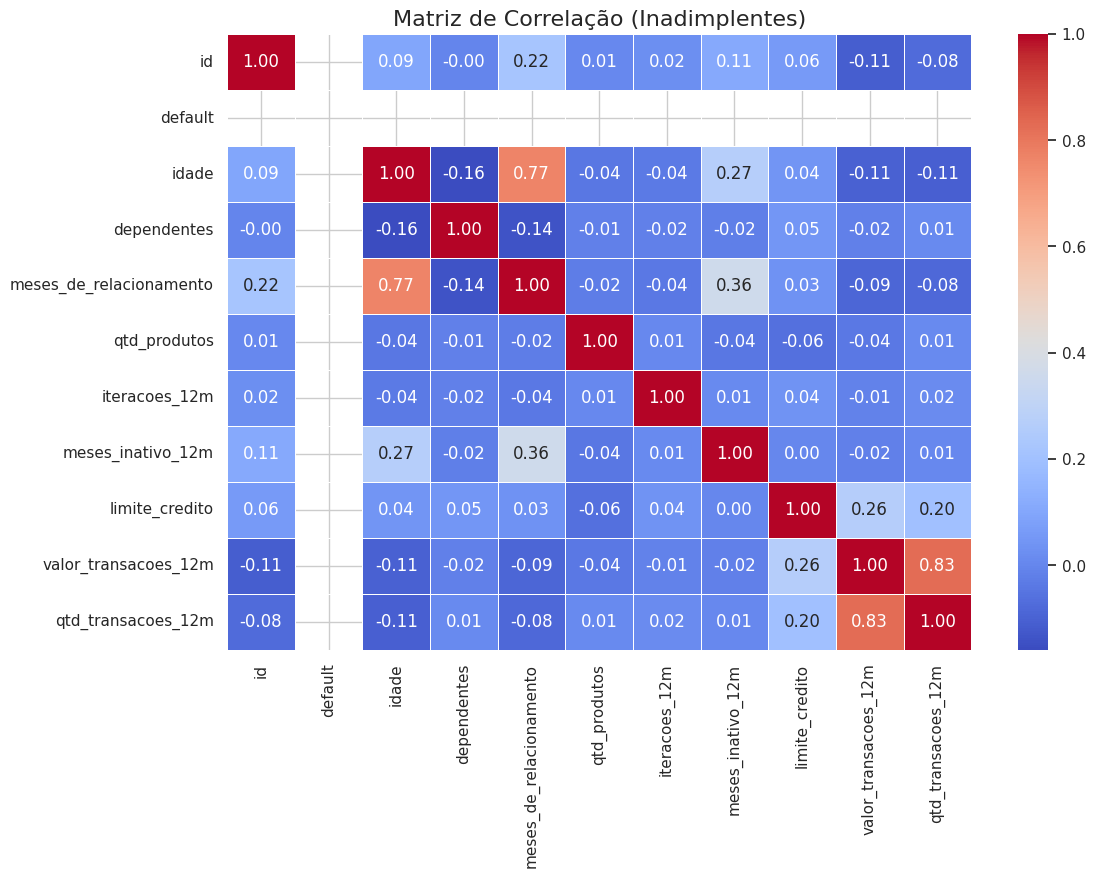

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
count,1627,1627,1627,1627,1627
unique,2,6,4,6,4
top,F,mestrado,casado,menos que $40000,blue
freq,930,487,709,612,1519


,id,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
count,1.627000e+03,1627.0,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,7.352614e+08,1.0,46.659496,2.402581,36.178242,3.279656,2.972342,2.693301,8136.519533,3095.515765,44.933620
std,3.557725e+07,0.0,7.665652,1.275010,7.796548,1.577782,1.090537,0.899623,9095.348927,2308.213713,14.568429
min,7.080833e+08,1.0,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.000000,510.160000,10.000000
25%,7.123713e+08,1.0,41.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2114.185000,1904.075000,37.000000
50%,7.165644e+08,1.0,47.000000,2.000000,36.000000,3.000000,3.000000,3.000000,4178.030000,2329.240000,43.000000
75%,7.683737e+08,1.0,52.000000,3.000000,40.000000,5.000000,4.000000,3.000000,9933.665000,2772.615000,51.000000
max,8.282949e+08,1.0,68.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.980000,10583.790000,94.000000


In [2]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo para os gráficos
sns.set(style="whitegrid")

# Caminho do arquivo no ambiente do Kaggle
file_path = '/kaggle/input/python-m10-support-material/Python_M10_support material.csv'

# Carregar os dados
data = pd.read_csv(file_path)

# Substituir a letra "K" por "000" na coluna 'salario_anual'
data['salario_anual'] = data['salario_anual'].str.replace('K', '000')

# Remover caracteres indesejados das colunas monetárias e convertê-las para numérico
data['limite_credito'] = data['limite_credito'].str.replace('.', '').str.replace(',', '.').astype(float)
data['valor_transacoes_12m'] = data['valor_transacoes_12m'].str.replace('.', '').str.replace(',', '.').astype(float)

# Excluindo espaços desnecessários nas colunas categóricas
categorical_columns = ['sexo', 'escolaridade', 'estado_civil', 'salario_anual', 'tipo_cartao']
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.str.strip())

# Filtrar apenas inadimplentes
inadimplentes = data[data['default'] == 1]

# Média de inadimplência por faixa salarial (apenas inadimplentes)
inadimplencia_por_salario = inadimplentes.groupby('salario_anual')['default'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=inadimplencia_por_salario.index, y=inadimplencia_por_salario.values, palette='mako')
plt.title('Média de Inadimplência por Faixa Salarial (Inadimplentes)', fontsize=16)
plt.xlabel('Faixa Salarial', fontsize=12)
plt.ylabel('Média de Inadimplência', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Proporção por escolaridade (apenas inadimplentes)
plt.figure(figsize=(8, 6))
inadimplentes['escolaridade'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'}
)
plt.title('Distribuição por Escolaridade (Inadimplentes)', fontsize=16)
plt.ylabel('')
plt.show()

# Gráfico de dispersão filtrado apenas para inadimplentes
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='limite_credito', y='valor_transacoes_12m', data=inadimplentes, alpha=0.5, color='coral'
)
plt.title('Relação entre Limite de Crédito e Valor de Transações (Inadimplentes)', fontsize=16)
plt.xlabel('Limite de Crédito', fontsize=12)
plt.ylabel('Valor de Transações nos Últimos 12 Meses', fontsize=12)
plt.show()

# Heatmap de correlação (apenas inadimplentes)
plt.figure(figsize=(12, 8))
correlation_matrix_inadimplentes = inadimplentes.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix_inadimplentes, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação (Inadimplentes)', fontsize=16)
plt.show()

# Exibir resumos descritivos
categorical_summary_inadimplentes = inadimplentes[categorical_columns].describe()
numeric_summary_inadimplentes = inadimplentes.describe()

display(categorical_summary_inadimplentes)
display(numeric_summary_inadimplentes)